In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

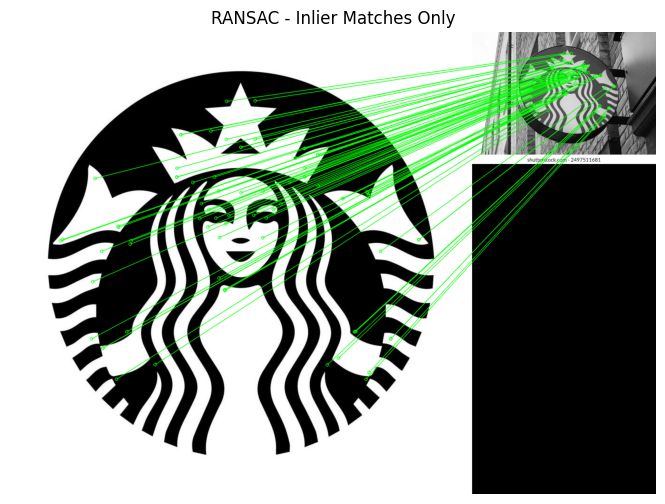

In [2]:
# Step 1: Load images
img1 = cv2.imread('image_1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('image_2.webp', cv2.IMREAD_GRAYSCALE)

# Step 2: Detect SIFT keypoints and descriptors
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Step 3: Match descriptors using KNN and ratio test
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Step 4: Apply Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Step 5: Prepare points for RANSAC
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Step 6: Apply RANSAC to find homography
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
matchesMask = mask.ravel().tolist()

# Step 7: Draw only inlier matches
ransac_result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
                                matchColor=(0, 255, 0), matchesMask=matchesMask,
                                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Step 8: Show result
plt.figure(figsize=(12, 6))
plt.imshow(ransac_result)
plt.title('RANSAC - Inlier Matches Only')
plt.axis('off')
plt.show()